In [1]:
import os
import pickle
import pprint
import matplotlib.pyplot as plt

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders = ["1", "2", "3"]
circuits = ["simple_circuit", "nurburgring", "montreal"]

In [88]:
def read_pkl(file):
    # print(file)
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

q_table = []
states_counter = []
states_cum_reward = []
states_steps = []

SHOW_PRINTS = False


circuits = ["simple_circuit", "nurburgring", "montreal"]
label_circuit = ["Circuito Simple", "Nürburgring", "Montreal"]
current_label_circuit = label_circuit[0]

action_group = ["simple", "medium", "hard"]

CIRCUIT = circuits[1]
CURRENT_ACTION = action_group[2]
POI = 3

folders = os.listdir(os.path.join(data_path, CIRCUIT))
if SHOW_PRINTS: print(f"Folders: {folders}")

current_group_expermiments_path = ""
for folder in folders:
    folder_action = folder.split("__")[-1]
    current_poi = folder.split("_")[0]
    
    if CURRENT_ACTION == folder_action and int(current_poi) == POI:
        if SHOW_PRINTS: print(f"FOLDER: {folder} - FOLDER ACTION: {folder_action} - CURRENT POI: {current_poi}")
        current_group_expermiments_path = os.path.join(data_path, CIRCUIT, folder)
        
if SHOW_PRINTS: print(f"Current group experiments: {sorted(os.listdir(current_group_expermiments_path))}")

for experiment_path in sorted(os.listdir(current_group_expermiments_path)):
    
    path_to_experiment = os.path.join(current_group_expermiments_path, experiment_path)
    if SHOW_PRINTS: print(f"experiment: {os.path.join(current_group_expermiments_path, experiment_path)}")
    
    files = sorted(os.listdir(path_to_experiment))
    if SHOW_PRINTS: print(f" Files in experiment path: {files}")
        
    if len(files) > 1:
        q_table.append(read_pkl(os.path.join(path_to_experiment, files[0])))
        states_counter.append(read_pkl(os.path.join(path_to_experiment, files[1])))
        states_cum_reward.append(read_pkl(os.path.join(path_to_experiment, files[2])))
        check_type = read_pkl(os.path.join(path_to_experiment, files[3]))
        if type(check_type) == dict:
            states_steps.append(check_type)

        if SHOW_PRINTS: print("readed")

print(f"READED --> CIRCUIT: {CIRCUIT} - ACTION SET: {CURRENT_ACTION} - POI: {POI}")

READED --> CIRCUIT: nurburgring - ACTION SET: hard - POI: 3


# DATOS CARGADOS --> GRÁFICAS

/home/nachoaz/Pictures


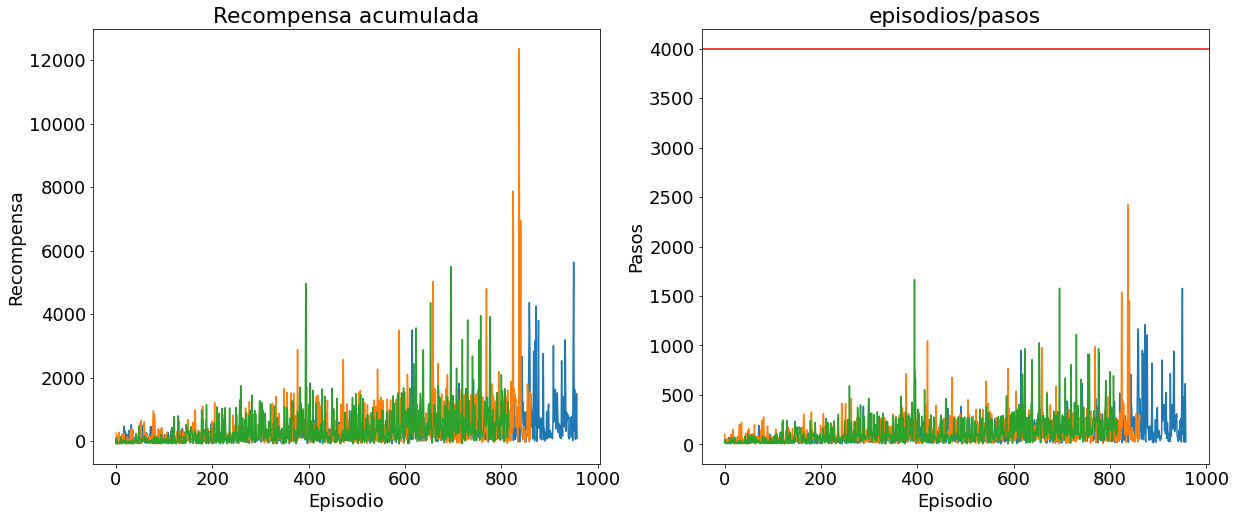

In [89]:
from collections import Counter

plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
# fig.suptitle(f"Resultados de entrenamiento para la combinación: Circuito: {current_label_circuit} - Conjunto de acciones: {CURRENT_ACTION} - Puntos de percepción: {POI}", fontsize=20)
if POI <= 1:
    axs[0].set_title('Contador de estados')
    axs[0].set(xlabel='Estados', ylabel='Frecuencia')
    megadict = {}
    print(len(states_counter))
    for dicc in states_counter:
        megadict = dict(Counter(**dicc))
        axs[0].bar(list(sorted(megadict.keys())), list(megadict.values()), color="blue")
        #axs[0].bar(list(sorted(states_counter[dicc].keys())), list(states_counter[dicc].values()), color="blue")

for j in range(len(states_cum_reward)):
    axs[0].plot(list(states_cum_reward[j].keys()), list(states_cum_reward[j].values()))
for k in range(len(states_steps)):
    axs[1].plot(list(states_steps[k].keys()), list(states_steps[k].values()))

    
    

if POI <= 1:
    axs[0].set_xticklabels([])

axs[0].set_title('Recompensa acumulada')
axs[1].set_title('episodios/pasos')

axs[1].axhline(y=4000, c='r')

# for ax in axs.flat:

axs[0].set(xlabel='Episodio', ylabel='Recompensa')
axs[1].set(xlabel='Episodio', ylabel='Pasos')

SAVE = True
if SAVE:
    file_name = "training_metrics_actions_{}"
    print(os.path.join(os.path.expanduser('~'), "Pictures"))
    # plt.savefig(os.path.join(os.path.expanduser('~'), "Pictures") + str(CIRCUIT) + str(CURRENT_ACTION) + str(POI) + ".png")
    plt.savefig("/home/nachoaz/Pictures/" + str(CIRCUIT) + "_" + str(CURRENT_ACTION) + "_" + str(POI) + ".png")

Tamaño del diccionario de estados: 3
996
Best state: 247 - with value: 8707


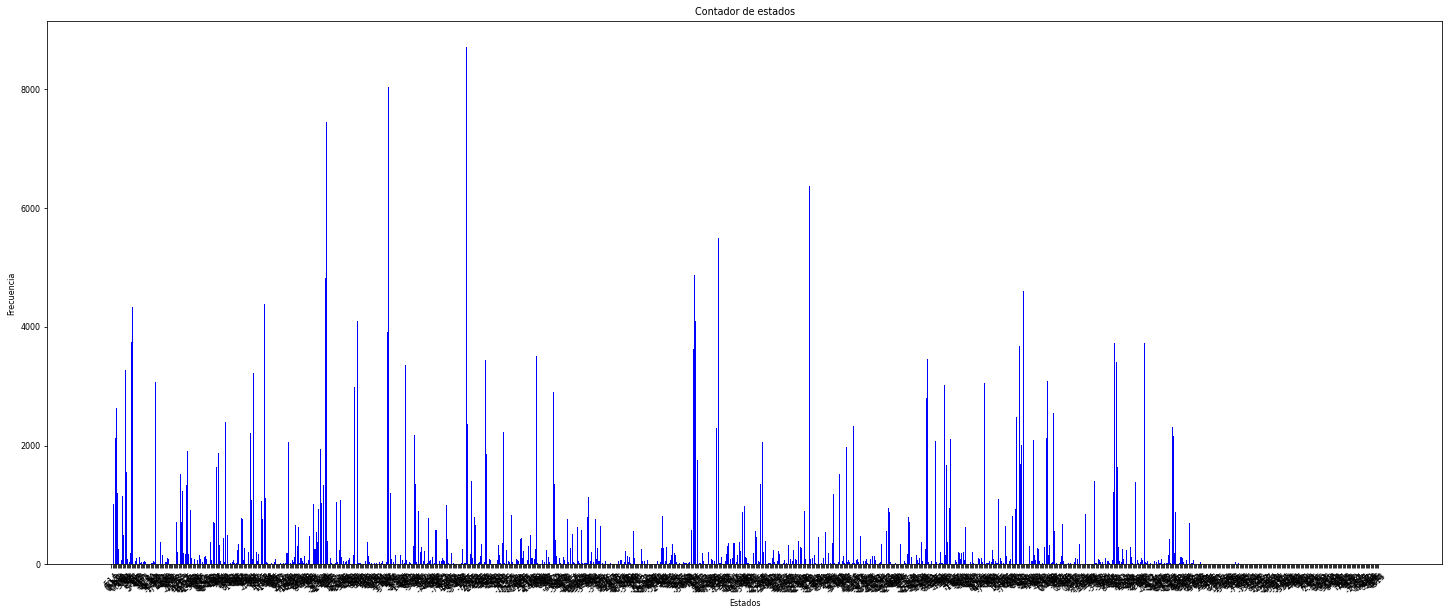

In [90]:
from collections import Counter

print(f"Tamaño del diccionario de estados: {len(states_counter)}")

A = Counter(**states_counter[0])
B = Counter(**states_counter[1])
C = Counter(**states_counter[2])

megadict = dict(A + B + C)
print(len(megadict))
# print(megadict)

max_value = max(megadict, key=megadict.get)
max_states_counter = megadict[max_value]

print(f"Best state: {max_value} - with value: {max_states_counter}")

plt.rcParams.update({'font.size': 8})
fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.set_title('Contador de estados')
axs.set(xlabel='Estados', ylabel='Frecuencia')
axs.bar(list(megadict.keys()), list(megadict.values()), color="blue")
axs.set_xticklabels(megadict, rotation=45)


plt.savefig("/home/nachoaz/Pictures/states_counter_" + str(CIRCUIT) + "_" + str(CURRENT_ACTION) + "_" + str(POI) + ".png")

# Aquí se sacan los valores máximos o más frecuente

In [87]:
# states_counter
# max_states_cum_reward
# max_states_steps

max_states_counter = 0
max_state = ""
for dicc in states_counter:
    print(dicc, "\n")
    max_value = max(dicc, key=dicc.get)
    if int(dicc[max_value]) > int(max_states_counter):
        max_states_counter = dicc[max_value]
        max_state = max_value
    
print(f"Best state: {max_state} - with value: {max_states_counter}")

{'-514': 8, '0-1-1': 168, '0-1-2': 654, '0-1-3': 813, '0-1-4': 708, '0-1-5': 324, '72-2': 8, '010': 16, '011': 99, '-3-68': 142, '013': 563, '014': 328, '015': 19, '-702': 5, '-703': 7, '4-38': 13, '61-1': 3, '344': 30, '345': 114, '346': 925, '347': 987, '5-1-5': 5, '5-1-7': 1, '5-1-6': 21, '348': 75, '815': 4, '816': 16, '0-68': 378, '51-1': 13, '51-3': 24, '51-2': 13, '51-4': 2, '52-2': 8, '52-1': 5, '72-1': 12, '-6-10': 4, '-6-11': 5, '-6-12': 3, '-1-5-7': 65, '-5-5-5': 2, '012': 309, '-7-2-3': 2, '21-1': 164, '21-2': 39, '21-3': 2, '598': 1, '-405': 16, '-404': 52, '-403': 44, '-402': 16, '-401': 6, '-400': 3, '278': 55, '-1-1-4': 178, '313': 4, '-1-1-1': 181, '-1-1-3': 438, '-1-1-2': 365, '-1-2-6': 85, '8-6-6': 52, '-1-2-4': 521, '-1-2-5': 719, '-1-2-2': 24, '-1-2-3': 147, '-5-3-6': 3, '-427': 1, '-313': 18, '-5-58': 70, '-311': 2, '-426': 4, '520': 17, '-316': 69, '-315': 35, '-314': 44, '8-5-4': 10, '8-5-5': 40, '8-5-6': 30, '8-5-7': 21, '8-5-2': 1, '8-5-3': 2, '-102': 84, '-10

In [ ]:
sorted(model, key=model.get, reverse=True)

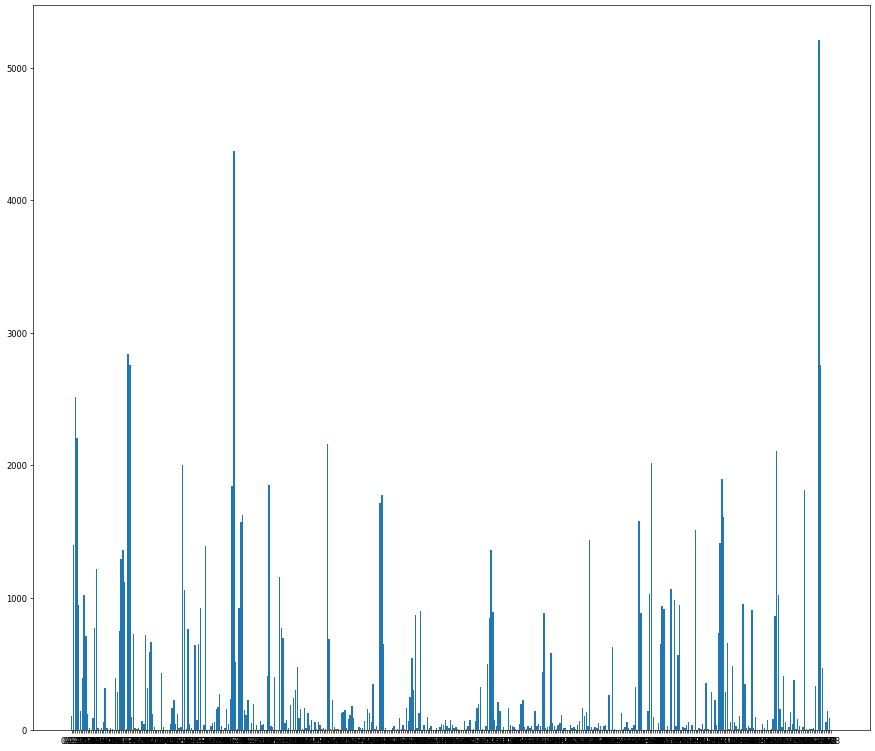

In [26]:
fig = plt.figure(figsize=(18, 16), dpi=60, facecolor='w', edgecolor='k')

plt.bar(range(len(model)), list(model.values()), align='center')
plt.xticks(range(len(model)), list(model.keys()))
plt.show()

## ODOMETRIA

In [558]:
import os
import pickle
import pprint
import numpy as np
import matplotlib.pyplot as plt

def read_pkl(file):
    # print(f"pkl readed ----> {file}")
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders= ["1", "2", "3"]


# CIRCUITO
circuits = ["simple_circuit", "nurburgring", "montreal"]
CIRCUIT = circuits[1]

# ACCION
action_group = ["simple", "medium", "hard"]
CURRENT_ACTION = action_group[1]

# POI
POI = "1"

experiments = ["", "1", "2", "3"]
experiment = experiments[3]

# folder_inference_path = os.path.join(data_path, CIRCUIT, POI + "_point__actions_set__" + CURRENT_ACTION, experiment)
inference_folder = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/simple_circuit/1_point__actions_set__hard/3/"
inference_path = inference_folder + "5_NO_COMPLETED_1_point__actions_set__hard_3_tested_on_simple_circuit_time_0:00:01.362161.pkl"

# inference_file = sorted(os.listdir(os.path.join(folder_inference_path)))[-1]
# inference_path = os.path.join(folder_inference_path, inference_file)
print(f"Folder Inference Path: {folder_inference_path}")
print(f"Inference File:        {inference_file}")
print(f"Inference Path:        {inference_path}")

rl_coords = read_pkl(inference_path)

rl_points = np.array([list(pos[1]) for pos in rl_coords])
print(f"LEN ALGORITHM POINTS: {len(rl_points)}")

#####################
# MANUAL PILOT COORDS
#####################
manual_path = './agents/f1/logs/' + CIRCUIT + '_manual_checkpoints.pkl'
manual_coords = read_pkl(manual_path)
manual_points = np.array([list(pos[1]) for pos in manual_coords])
print(f"LEN MANUAL POINTS: {len(manual_points)}")

Folder Inference Path: ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/2/5_checkpoints_1_point__actions_set__medium_2_tested_on_simple_circuit_time_0:06:33.602913.pkl
Inference File:        ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/2/5_checkpoints_1_point__actions_set__medium_2_tested_on_simple_circuit_time_0:06:33.602913.pkl
Inference Path:        ./agents/f1/logs/qlearn_models/qlearn_camera_solved/simple_circuit/1_point__actions_set__hard/3/5_NO_COMPLETED_1_point__actions_set__hard_3_tested_on_simple_circuit_time_0:00:01.362161.pkl
LEN ALGORITHM POINTS: 7
LEN MANUAL POINTS: 65


In [545]:
from scipy.spatial import distance
import numpy as np

max_dist = 5

result = []
manual_points_counter = np.copy(manual_points)

for idx, rl_point in enumerate(rl_points):
    dist = (manual_points_counter - rl_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    if len(dist) == 0:
        continue

    if min(dist) < max_dist and not len(result) >= len(manual_points):
        result.append([min(dist), rl_coords[idx][1]])
        manual_points_counter = np.delete(manual_points_counter, 0, axis=0)

print(f" points matched -->  {len(result)}")
print(f" total points ---->  {len(manual_points)}")

if len(result) == len(manual_points):
    print("LAP COMPLETED. 100%")
else:
    percentage_lap_completed = len(result) / len(manual_points) * 100
    print(f"The car has complete the {round(percentage_lap_completed, 2)} % of the circuit")

 points matched -->  2
 total points ---->  65
The car has complete the 3.08 % of the circuit


# Gráfica de PID

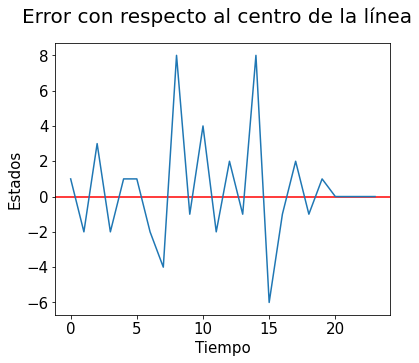

In [538]:
import numpy as np

values = np.array([1, -2, 3, -2, 1, 1, -2, -4, 8, -1, 4, -2, 2, -1, 8, -6, -1, 2, -1, 1, 0, 0, 0, 0])

fig, axs = plt.subplots(1, 1, figsize=(6, 5))
fig.suptitle(f"Error con respecto al centro de la línea", fontsize=20)

axs.set(xlabel='Tiempo', ylabel='Estados')
axs.axhline(y=0, c='r')

plt.plot(values)

plt.savefig("/home/nachoaz/Pictures/p_control.png")